In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib.lines import Line2D
plt.style.use(["science","grid"])
def normalise(arr):
    arrmax = np.max(arr)
    arrmin = np.min(arr)
    
    arrnorm = (arr - arrmin) / (arrmax - arrmin)
    
    return arrnorm
def ticks_labels(nb_days):
    if 30%nb_days != 0:
        raise ValueError 
    else:
        vec = np.linspace(0,4320,int(30/nb_days)+1)
        labs = list()
        for i in range(int(30/nb_days)+1):
            labs.append("Day %s"%(i*nb_days))
        return vec,labs

my_palette = {}
my_palette['dark'] = ['midnightblue', 'chocolate', 'darkolivegreen']
my_palette['light'] = ['cornflowerblue','orange','yellowgreen']
my_palette['reds'] = []

In [3]:
data1 = pd.read_feather("./sampling_base/sampling_base_15") # rerouting 30                        
data2 = pd.read_feather("./sampling_base/sampling_base_batch") # rerouting 30

input1 = pd.read_csv("./sampling_base/input_parameters_15.csv")
input2 = pd.read_csv("./sampling_base/input_parameters_batch.csv")

data2.o0 = data2.o0 + len(input1)

data = pd.concat([data1,data2]).reset_index()
input_vars = pd.concat([input1,input2]).reset_index()

In [7]:
q_sum = list()
n_facs = 12
for j in input_vars.index:
    tmp_sum = 0
    for i in range(n_facs):
        tmp_sum += ( np.sum(data[data.o0==j].iloc[:,i+4]))  
    
    q_sum.append(tmp_sum) 

<ipython-input-40-04890b91f3e2>:38: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_yticklabels(np.linspace(0,50,6))


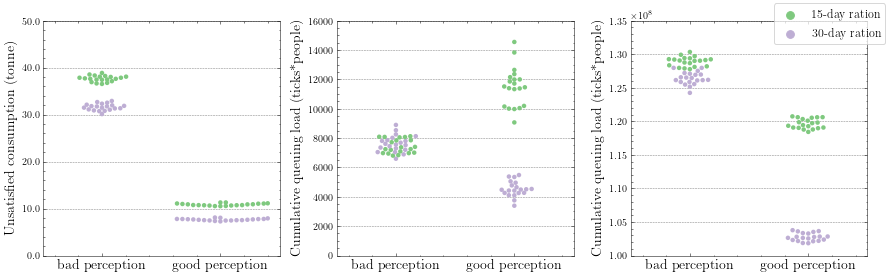

In [40]:
fig, ax = plt.subplots(1,3,figsize=(12.5,4))

uc_endvals_dict = {}
uc_endvals_dict["unsatisfied consumption"] = list()
uc_endvals_dict["fac5"] = list()
uc_endvals_dict["allfacs"] = list()

strings = ["unsatisfied consumption","fac5","allfacs"]

for j in input_vars.index:
    uc_endvals_dict["unsatisfied consumption"].append(data.o1[data.o0==j].iloc[-1])
    uc_endvals_dict["fac5"].append( np.sum(data[data.o0==j].iloc[:,9]))
    uc_endvals_dict["allfacs"].append( q_sum[j] )


uc_endvals_df = pd.DataFrame(uc_endvals_dict)
input_vars_filtered = pd.concat([input_vars,uc_endvals_df],axis=1)
input_vars_filtered = input_vars_filtered.rename(columns={"ration_size_policy": "rationsizepolicy"})
input_vars_filtered = input_vars_filtered[input_vars_filtered.beta==1.0]
input_vars_filtered = input_vars_filtered[input_vars_filtered.epsilon!=0.5]
input_vars_filtered = input_vars_filtered[input_vars_filtered.gamma==3.0]
input_vars_filtered = input_vars_filtered[input_vars_filtered.parallel_served_full==7.8]

ylims = [ [0,50e3],[0,16e3],[1e8,1.35e8]]
ylabels = ["Unsatisfied consumption (tonne)","Cumulative queuing load (ticks*people)","Cumulative queuing load (ticks*people)"]


for i in range(len(strings)):
    sns.swarmplot(ax=ax[i],x="epsilon",y=strings[i],hue='rationsizepolicy',data=input_vars_filtered,palette='Accent',size=4.5)
    ax[i].set_ylim(ylims[i])
    ax[i].set_xticklabels(["bad perception","good perception"],fontsize=14)
    ax[i].set_ylabel(ylabels[i],fontsize=14)
    ax[i].set_xlabel(None)
ax[0].get_legend().remove()
ax[1].get_legend().remove()
handles = ax[i].get_legend_handles_labels()[0]
ax[2].legend(handles[:3], ["15-day ration","30-day ration"],loc='upper right',fontsize=12,bbox_to_anchor=(1.1, 1.1),framealpha=0.75)
ax[0].set_yticklabels(np.linspace(0,50,6))
fig.tight_layout() 
    

plt.savefig("/home/daan/Desktop/15dayration_otherkpis.png")